# Homework 3 Group 4


- Deekshitha Gona Id: 2399282
- Yuzhen Hu  Id: 2299391
- Jayaprakash Yadav Guntumani Id: 2391724
- Aakanksha Govindaraju Id: 2384001
- George Dani Id: 1844097



**PART 1 (Jayaprakash Yadav Guntumani, George Dani , Aakanksha Govindaraju)**

Why is output of σ in the interval (0, 1)?
Why the output of σ cannot equal 0 or 1?
For what value of z is σ(z) = 0.5?
Show that σ′(z) = σ(z) · (1 − σ(z)).

**PART 2 (Yuzhen Hu,Deekshitha Gona)**

Use the HR.csv dataset and consider the column “left” as the target variable: “1” meaning the person left the company.

“0” meaning that the person did not leave the company.

Investigate using various graphs/charts how the given features affect the target variable.

Choose several features and build an sklearn logistic regression model predicting the target variable “left”.

Discuss the model performance, including the confusion matrix and the classification report, on the test set.

# part I

## 1.  Why is output of σ in the interval (0, 1)?

The sigmoid function is defined as :
σ(z) = 1 / (1 + e^(-z))

- `e^(-z)` is **monotonically decreasing**, so `σ(z)` is **monotonically increasing**.

- As `z → -∞`, `σ(z) → 0`.

- As `z → +∞`, `σ(z) → 1`.

- The domain of the sigmoid function spans all real numbers, but its **range** is in `(0, 1)`.

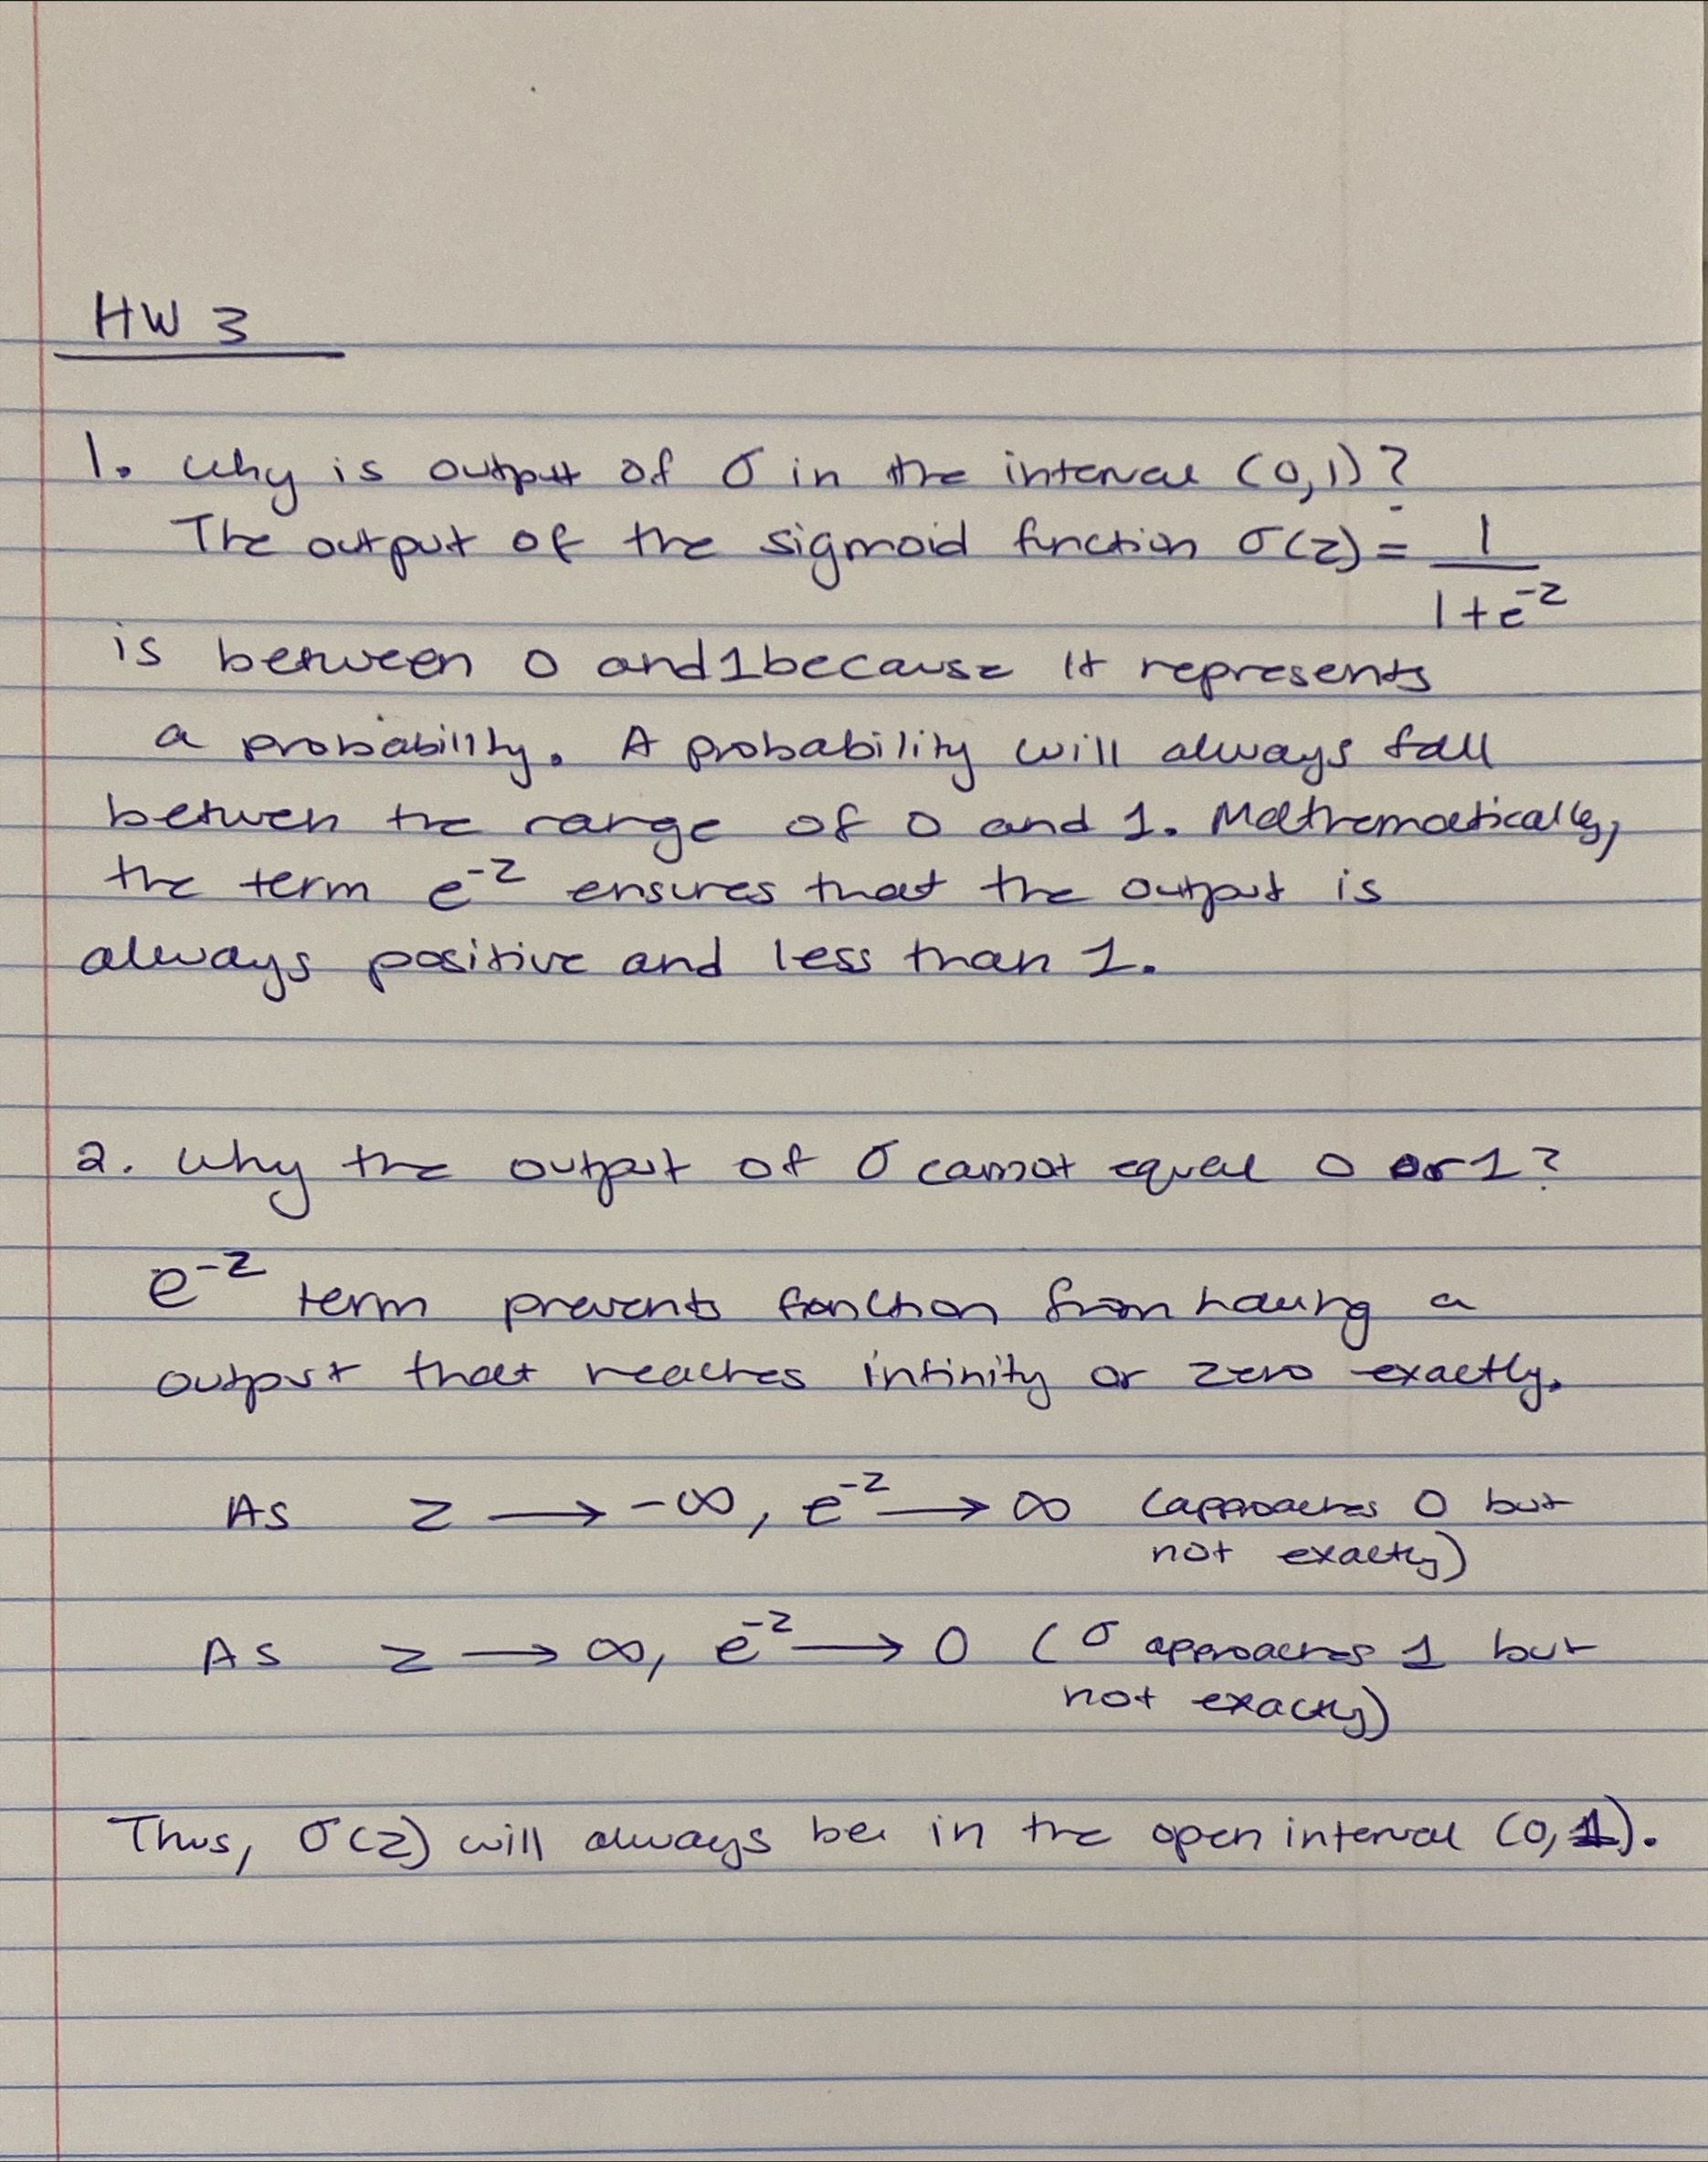

## 2. Why the output of σ cannot equal 0 or 1?
1.  **Monotonicity**:
   The sigmoid function is **monotonically increasing**, which means it always increases as `z` increases.

2. **Sigmoid at Positive and Negative Infinity**:
   - As `z` approaches positive infinity (`z -> +∞`), `e^(-z)` approaches 0, so `σ(z)` approaches 1.
   - As `z` approaches negative infinity (`z -> -∞`), `e^(-z)` approaches infinity, so `σ(z)` approaches 0.


## 3. For what value of z is σ(z) = 0.5?
Given  σ(z) = 1 / (1 + e^(-z)) ,  Set `σ(z) = 0.5` and solve for `z`:
:

The value of `z` that makes `σ(z) = 0.5` is `z = 0`.




## 4. Show that σ′(z) = σ(z) · (1 − σ(z)).

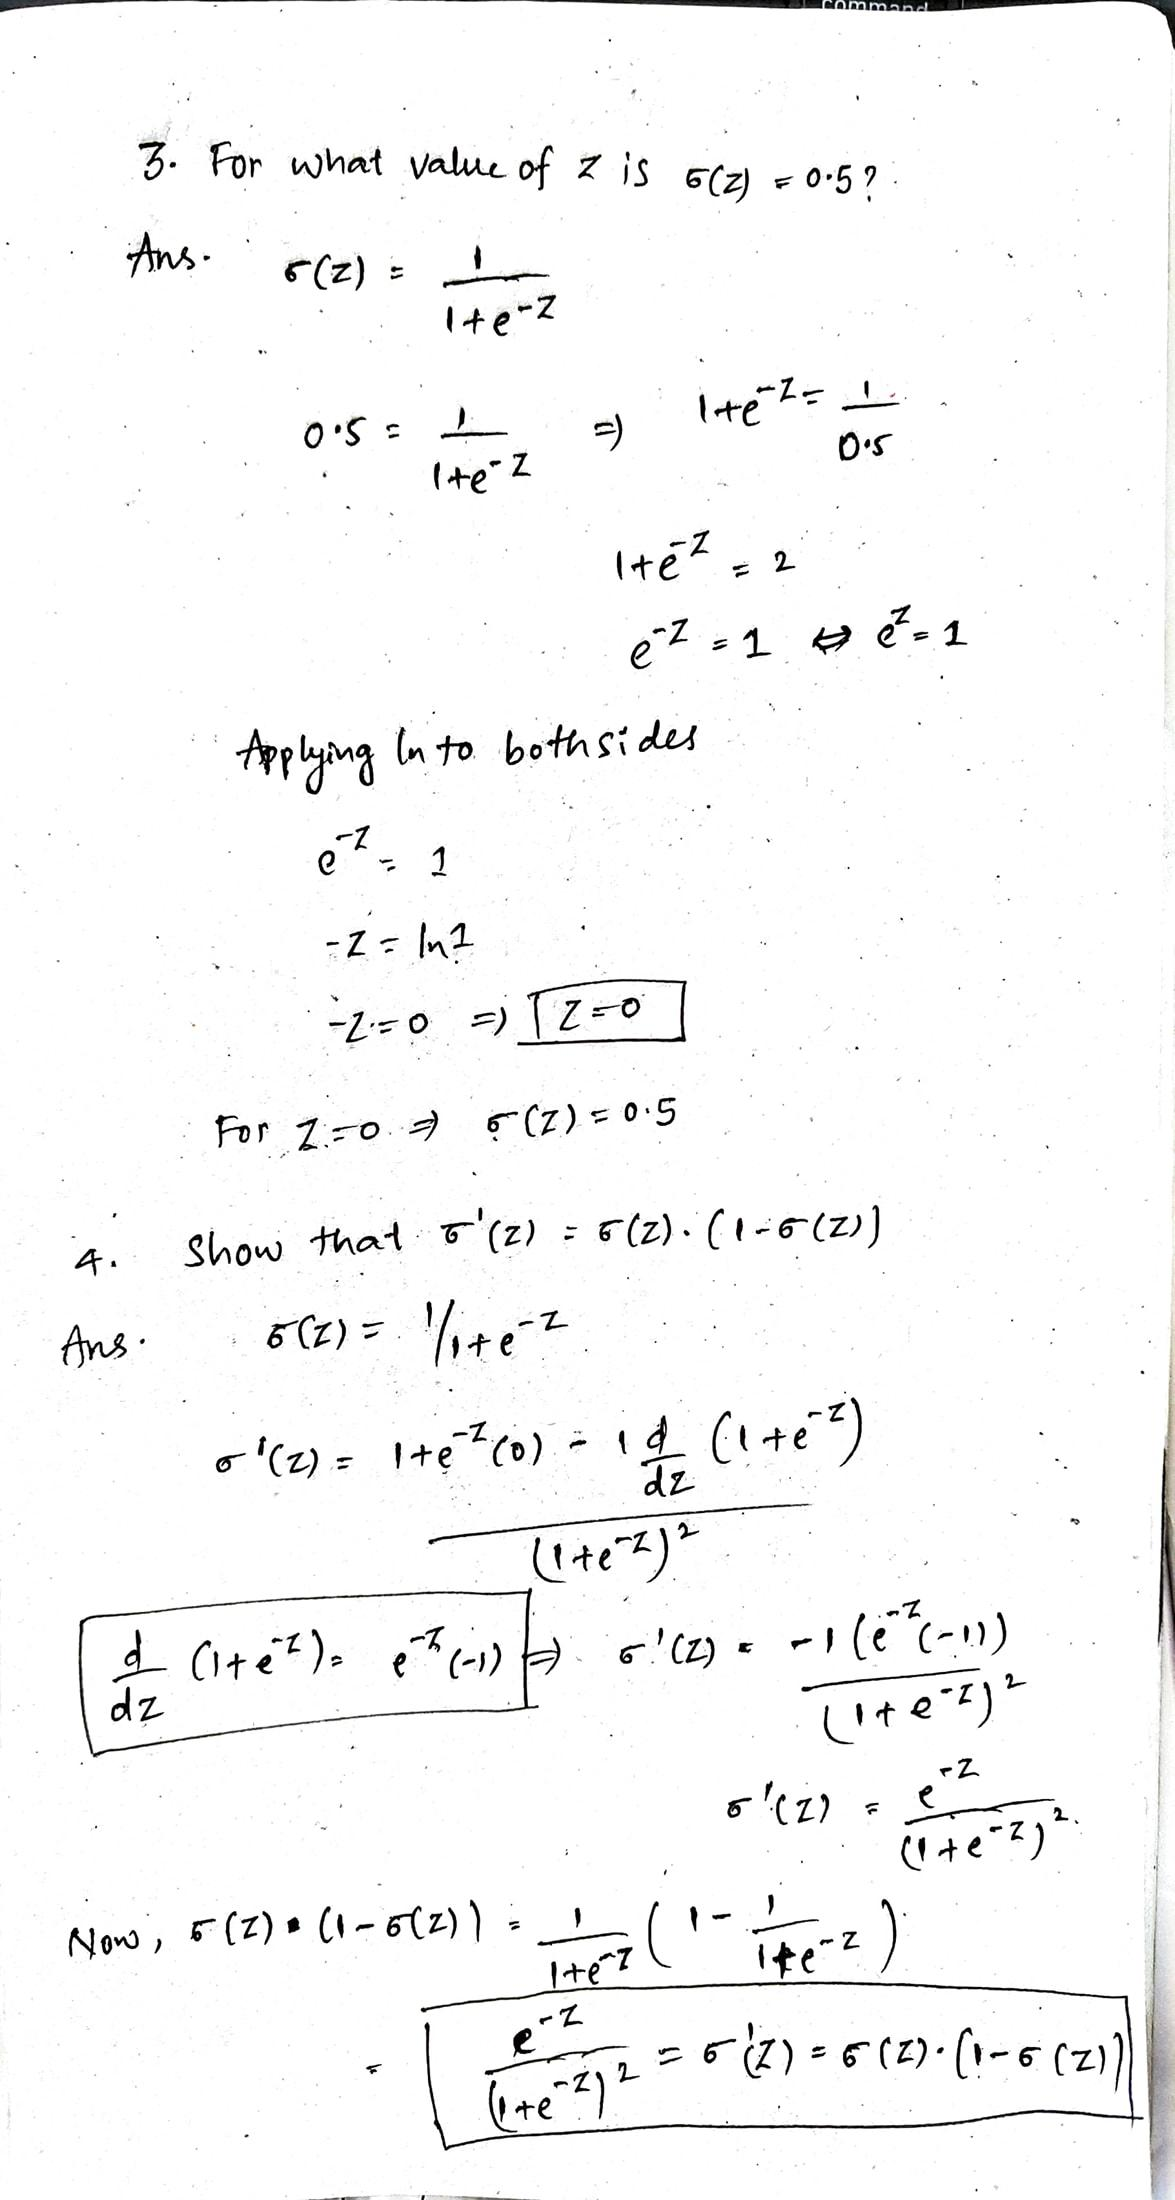

## 1)Using sklearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [ ]:
df = pd.read_csv('/content/HR.csv')
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

## EDA

<Axes: >

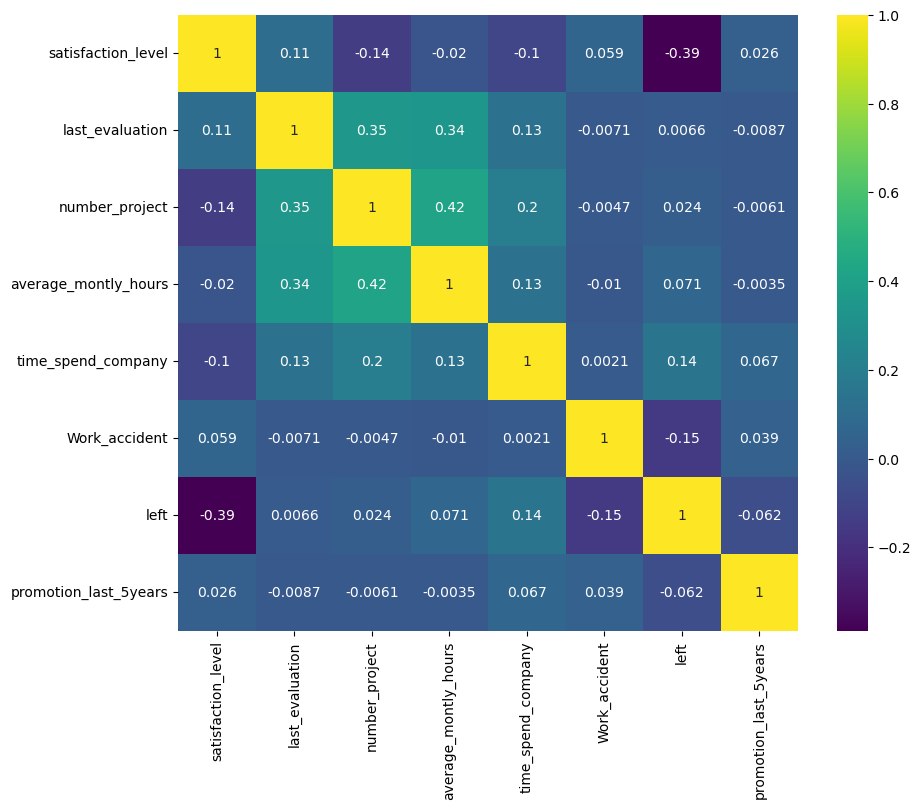

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),cmap='viridis',annot=True)

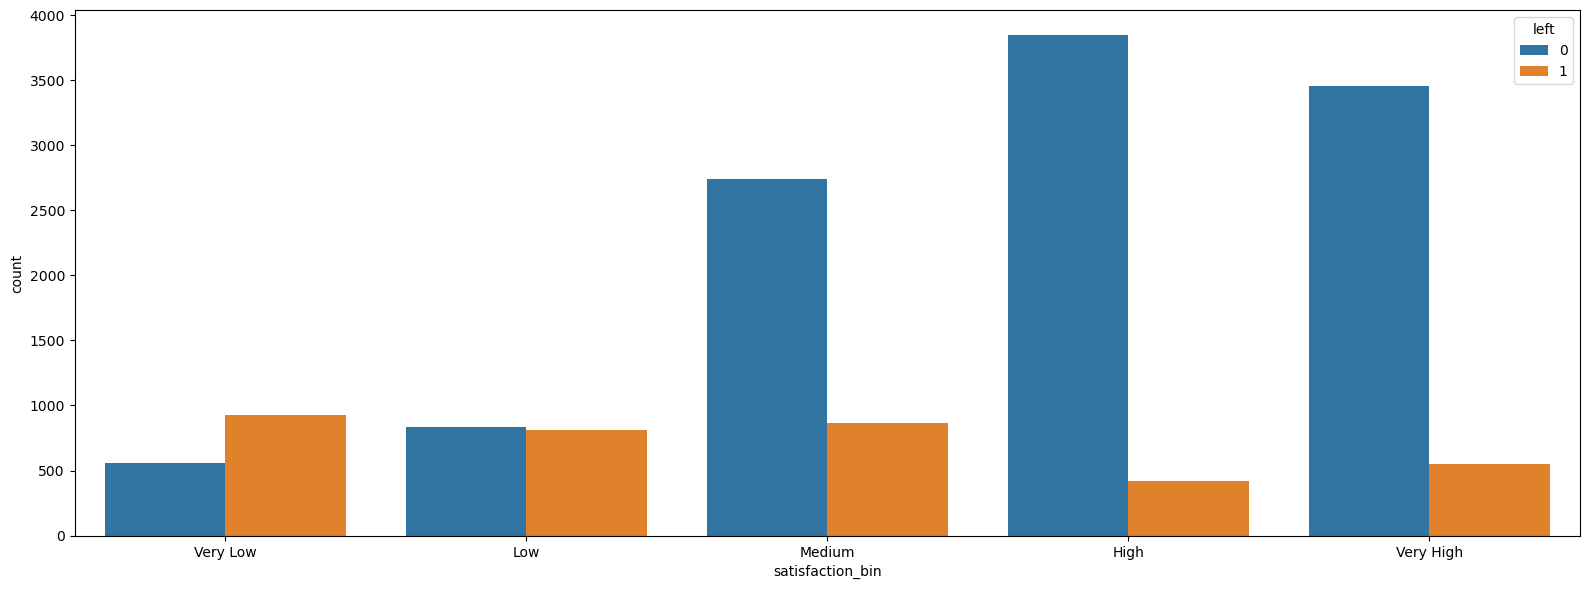

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Create bins for satisfaction levels
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['satisfaction_bin'] = pd.cut(df['satisfaction_level'], bins=bins, labels=labels)

# Use the binned satisfaction levels for the countplot
sns.countplot(x='satisfaction_bin', hue='left', data=df)
plt.tight_layout()

### As we can see that people with low satisfaction tends to leave from job, and high satisfied people don't.

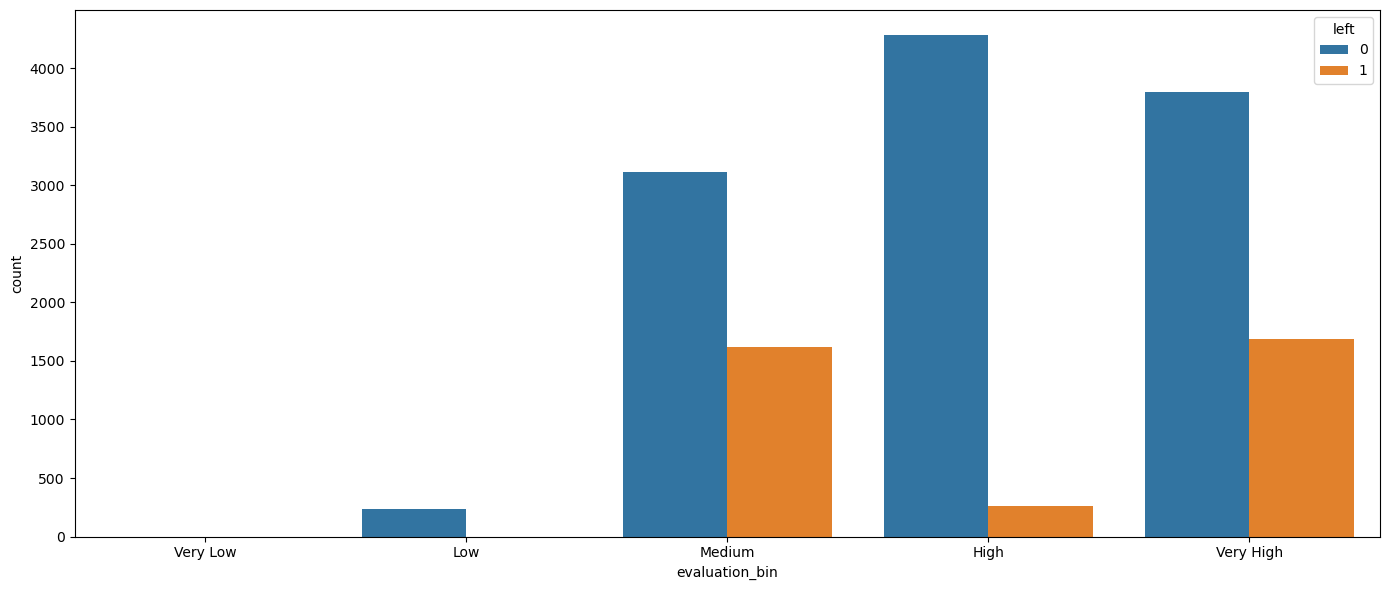

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

# Binning 'last_evaluation' for better visualization
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['evaluation_bin'] = pd.cut(df['last_evaluation'], bins=bins, labels=labels)

sns.countplot(x='evaluation_bin', hue='left', data=df) # Use binned values for x-axis
plt.tight_layout()

## Observation: people in the medium level to very high(>0.6) tends to leave the job because there might be some other better offers for them.If we look at evals of 1, it appears they gain confidence and look for places to move up.

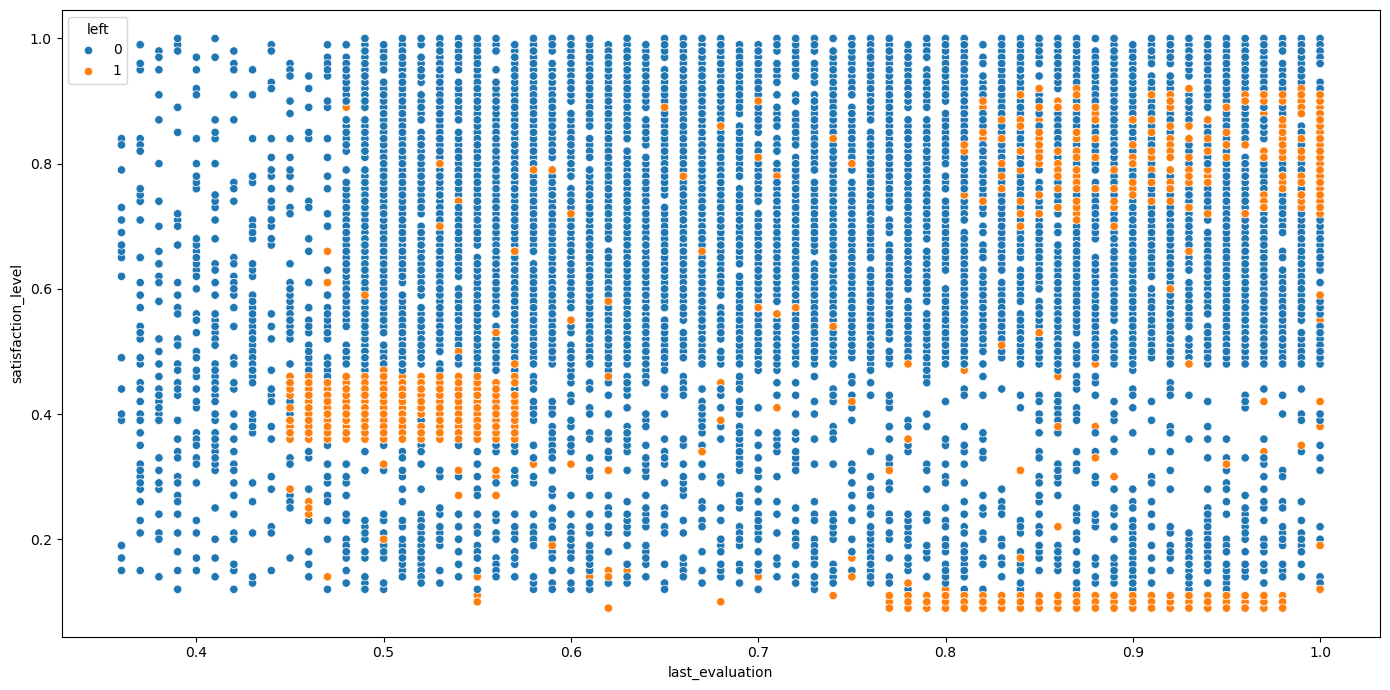

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='last_evaluation', y='satisfaction_level', hue='left', data=df)
plt.tight_layout()

## Observation: people with very low and very high satisfaction and Higher last evaluation tends to leave the job to search for better opportunities. Whereas people with low last satisfaction stays in same job may be to improve their skillset.

C:\Users\hyz20\AppData\Local\Temp\ipykernel_29848\185880641.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='evaluation_bin', y='satisfaction_level', hue='left', data=df, ci=None)


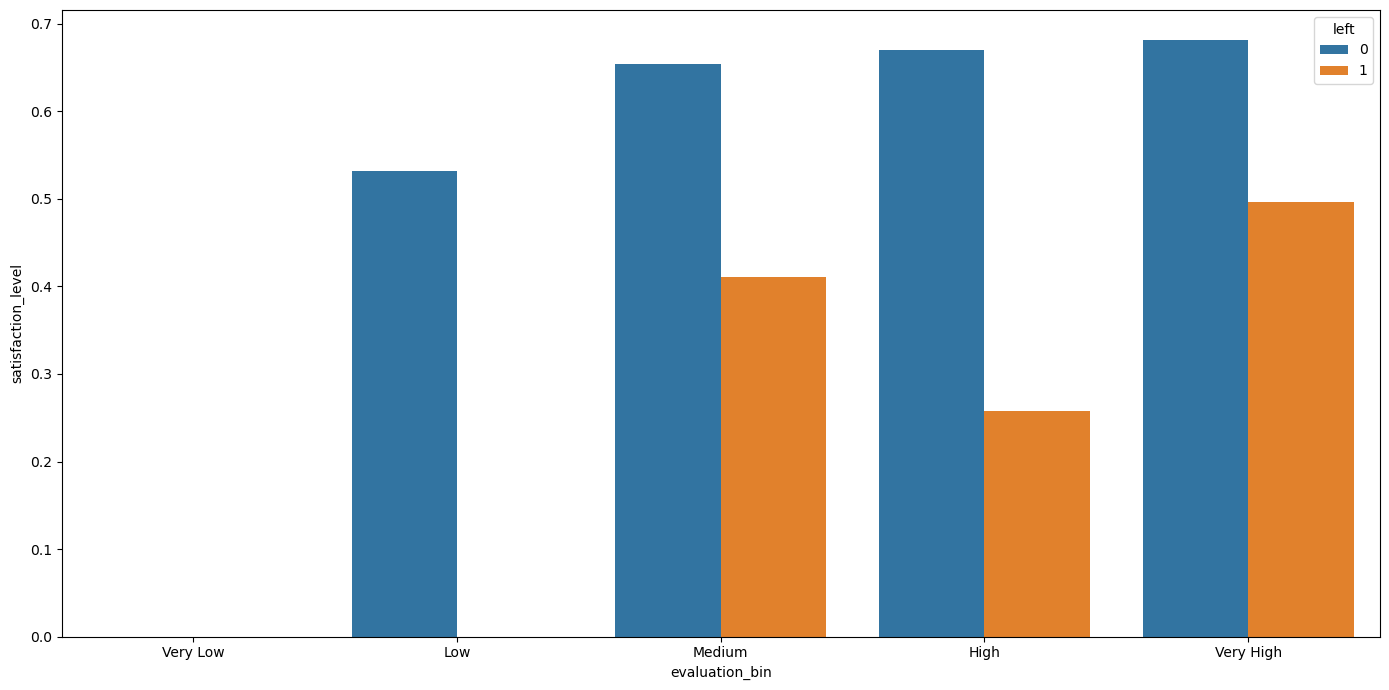

In [ ]:
plt.figure(figsize=(14,7))

# Binning 'last_evaluation' for better visualization
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['evaluation_bin'] = pd.cut(df['last_evaluation'], bins=bins, labels=labels)

sns.barplot(x='evaluation_bin', y='satisfaction_level', hue='left', data=df, ci=None)
plt.tight_layout()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="average_montly_hours", color="left",  marginal="rug", hover_data=df.columns)
fig.show()

## Observation: Those with low average_monthly_hours and very high monthly_hours left the job because their salary level is low

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="time_spend_company", color="left", marginal="rug", hover_data=df.columns)
fig.show()

## Around 3k+ employers left the job after spending 3-5 years, because their salary level is low

<Axes: xlabel='Department', ylabel='count'>

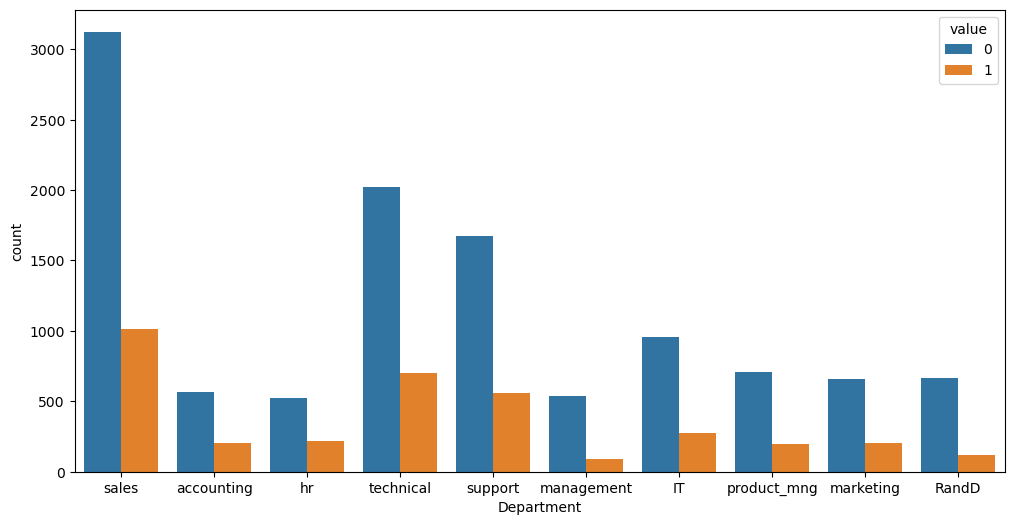

In [ ]:
plt.figure(figsize=(12,6))
# Convert the data to long-form using the melt function
df_melted = pd.melt(df, id_vars=['Department'], value_vars=['left'])
sns.countplot(x='Department', hue='value', data=df_melted)

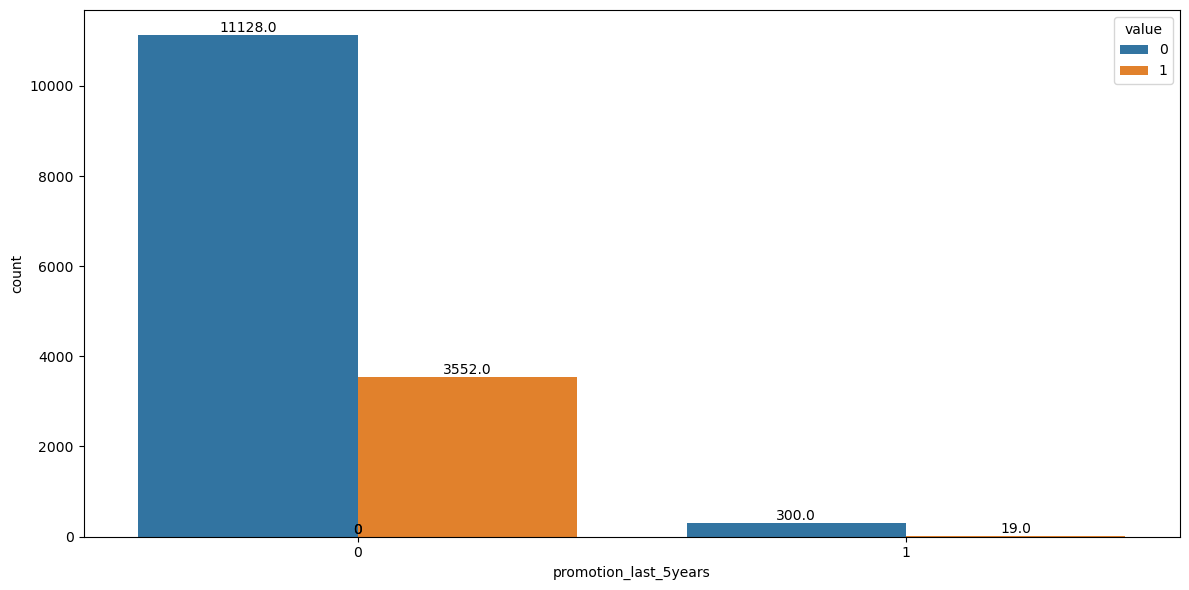

In [ ]:
plt.figure(figsize=(12,6))

# Convert the data to long-form using the melt function
df_melted = pd.melt(df, id_vars=['promotion_last_5years'], value_vars=['left'])

# Use the melted DataFrame for the countplot
ax = sns.countplot(x='promotion_last_5years', hue='value', data=df_melted)

# Add count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

## low promotion rates lead employees to leave the job

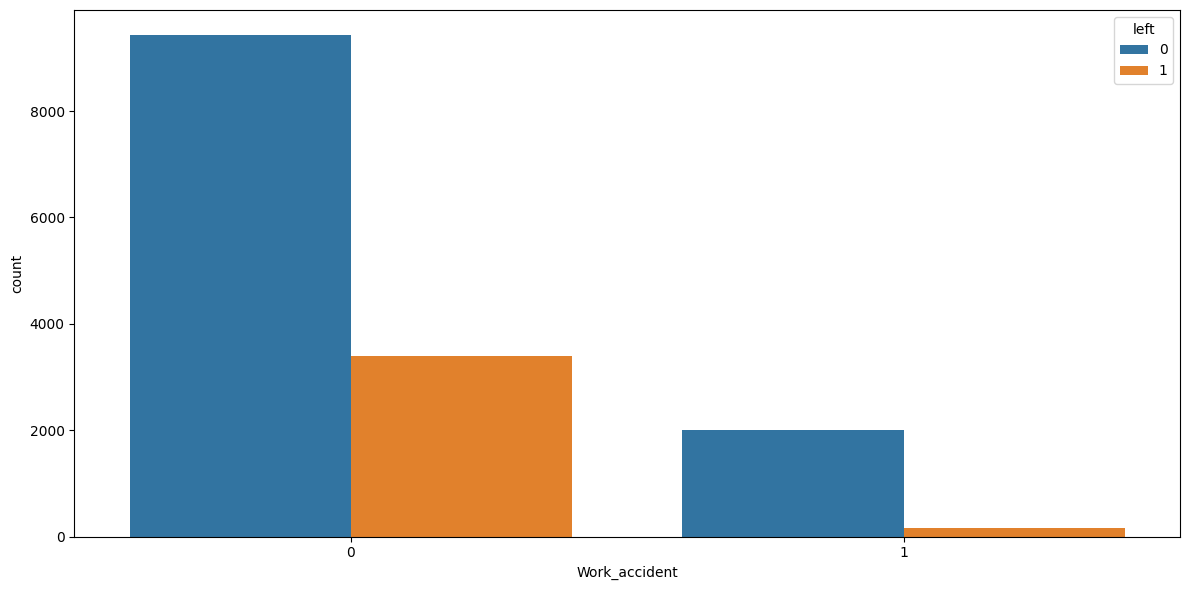

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Work_accident', hue='left', data=df)
plt.tight_layout()


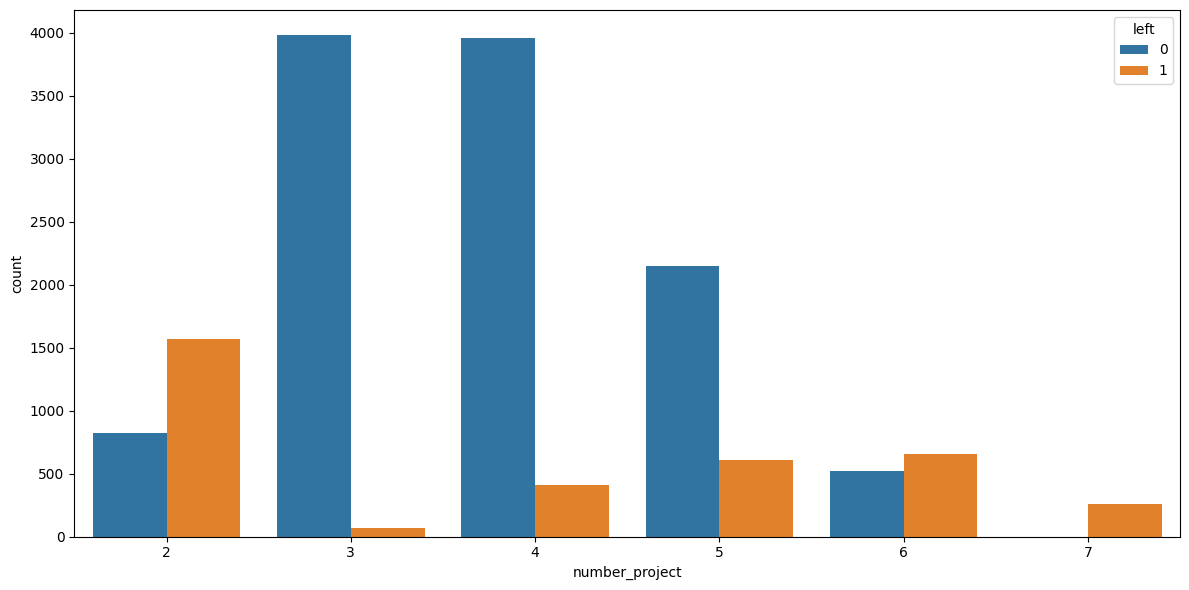

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='number_project', hue='left', data=df)
plt.tight_layout()


## People with low number_projects(2,3) and many number_project (6-7) left the company

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="salary", color="left", marginal="rug", hover_data=df.columns)
fig.show()

## People with low salary left the job.

### Map the values of the salary and Department columns to numerical values.

In [14]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [15]:
def sal_class(x):
    if x == "low":
        return 1
    elif x == "medium":
        return 2
    elif x == "high":
        return 3

In [16]:
df['sal_class'] = df['salary'].apply(sal_class)
df['sal_class'].value_counts()

sal_class
1    7316
2    6446
3    1237
Name: count, dtype: int64

In [17]:
df['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [18]:
def job_class(x):
    if x == "sales":
        return 1
    elif x == "technical":
        return 2
    elif x == "support":
        return 3
    elif x == "IT":
        return 4
    elif x == "product_mng":
        return 5
    elif x == "marketing":
        return 6
    elif x == "RandD":
        return 7
    elif x == "accounting":
        return 8
    elif x == "hr":
        return 9
    elif x == "technical":
        return 10
    elif x == "management":
        return 11

In [19]:
df['job_class'] = df['Department'].apply(job_class)
df['job_class'].value_counts()

job_class
1     4140
2     2720
3     2229
4     1227
5      902
6      858
7      787
8      767
9      739
11     630
Name: count, dtype: int64

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours',
        'time_spend_company','Work_accident','promotion_last_5years','sal_class']]
y = df['left']

In [21]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
#instantiating the model
logmodel = LogisticRegression()

In [23]:
#fitting the model
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [24]:
#making predictions
predictions = logmodel.predict(X_test)

In [25]:
# Metrics to understand our model
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3431
           1       0.60      0.36      0.45      1069

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500

[[3177  254]
 [ 683  386]]


## Accuracy is 79%

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Let's remove some features(time_spend_company) and built the model again as it doesn't signifies much


In [26]:
X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','Work_accident','promotion_last_5years','sal_class']]
y = df['left']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [28]:
predictions = logmodel.predict(X_test)

In [29]:
# Metrics to understand our model
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3431
           1       0.66      0.37      0.47      1069

    accuracy                           0.80      4500
   macro avg       0.74      0.65      0.68      4500
weighted avg       0.79      0.80      0.78      4500

[[3228  203]
 [ 678  391]]


## 80% Accuracy

### Keep above selected features unchanged, scale the features

In [30]:
from sklearn.preprocessing import StandardScaler
X = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','Work_accident','promotion_last_5years','sal_class']]

y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logmodel = LogisticRegression()
logmodel.fit(X_train_scaled,y_train)
predictions = logmodel.predict(X_test_scaled)
# Metrics to understand our model
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3431
           1       0.66      0.37      0.48      1069

    accuracy                           0.81      4500
   macro avg       0.74      0.66      0.68      4500
weighted avg       0.79      0.81      0.78      4500

[[3227  204]
 [ 671  398]]


###  81% Accuracy